The following consists of an assignment from the 5th course for IBM Data Science Professional Certificate. The task is to generate dashboards of stocks and revenues for Tesla and GameStop. The stock data is obtained by **yfinance** library, and the revenue data are given in tables of websites provided by the course.

In [40]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

!pip install yfinance==0.1.70
# The previous version suggested in the course does not seem to work.

In [34]:
!pip install mamba
!mamba install bs4==4.10.0
!pip install nbformat==5.7.0



0 examples ran in 0.0000 seconds


In [35]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

**Question 1. Extracting Tesla Stock Data Using yfinance**

In [7]:
tesla = yf.Ticker("TSLA")

In [8]:
tesla_data = tesla.history(period="max") # get historical market data for TSLA
tesla_data = pd.DataFrame(tesla_data) # the data in the form of Pandas DataFrames
tesla_data.reset_index(inplace=True) # Putting index for each line
tesla_data.head() # Show the first 5 lines

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


**Question 2. Extracting Tesla Revenue Data Using Webscraping**

In [9]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html = requests.get(url).text

In [10]:
soup = BeautifulSoup(html, "html.parser")

In [42]:
trs = soup.find_all("tbody")[1]
trs = trs.find_all("tr")
# Erases the unique pair of tbodies


# One needs to look at the raw html codes before to be able to decide what to write above

tesla_revenue = []
for line in trs:
    date = line.find_all("td")[0].text
    revenue = line.find_all("td")[1].text
    tesla_revenue.append([date, revenue])
    # append does not exist for DataFrames in latest Pandas

tesla_revenue = pd.DataFrame(tesla_revenue, columns=["Date", "Revenue"])

# the following removes the comma and the dollor sign from the Revenue column
tesla_revenue.Revenue = tesla_revenue.Revenue.str.replace(',|\$',"", regex=True)
# the following removes a null or empty strings in the Revenue column
# Not having regex=True returns a ValueError! See: https://stackoverflow.com/questions/8420143/valueerror-could-not-convert-string-to-float-id
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


**Question 3. Extracting GameStop Stock Data Using yfinance**

In [12]:
gme = yf.Ticker("GME")

In [13]:
gme_data = gme.history(period='max')
gme_data = pd.DataFrame(gme_data)
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


**Question 4. Use Webscraping to Extract GME Revenue Data**

In [14]:
url_data = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data = requests.get(url_data).text

In [15]:
soup2 = BeautifulSoup(html_data, "html.parser")

In [43]:
trs = soup2.find_all("tbody")[1]
trs = trs.find_all("tr") # Erases the unique pair of tbodies

gme_revenue = []

for line in trs:
    date = line.find_all("td")[0].text
    revenue = line.find_all("td")[1].text
    gme_revenue.append([date, revenue])
    
gme_revenue = pd.DataFrame(gme_revenue, columns=["Date", "Revenue"])

# the following removes the comma and the dollor sign from the Revenue column
gme_revenue.Revenue = gme_revenue.Revenue.str.replace(',|\$',"", regex=True)
# the following removes a null or empty strings in the Revenue column
# Not having regex=True returns a ValueError! See: https://stackoverflow.com/questions/8420143/valueerror-could-not-convert-string-to-float-id
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [17]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

**Question 5.Tesla Stock and Revenue Dashboard**

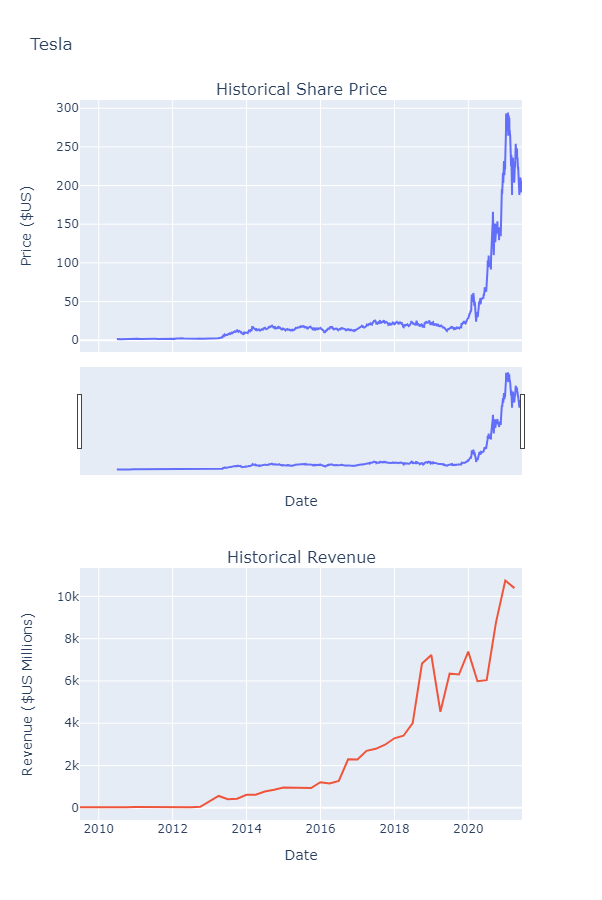

In [41]:
# make_graph(-, -, -) defined above (not in the screenshot)
make_graph(tesla_data, tesla_revenue, 'Tesla')

**Question 6. GameStop Stock and Revenue Dashboard**

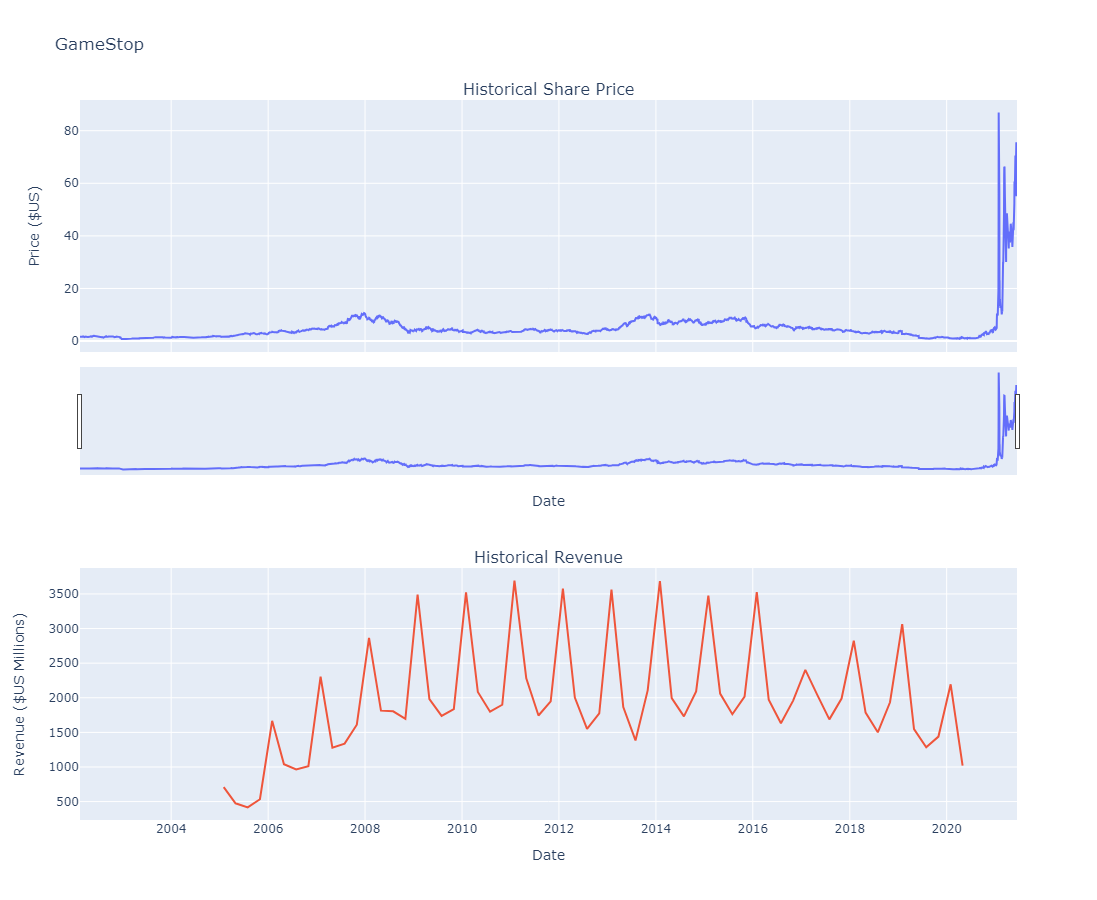

In [45]:
# make_graph(-, -, -) defined above (not in the screenshot)
make_graph(gme_data, gme_revenue, 'GameStop')